<div class="alert alert-block alert-info" align=center><b></b>

# Sentiment Analysis of “The Lion King (2019)” Movie Reviews

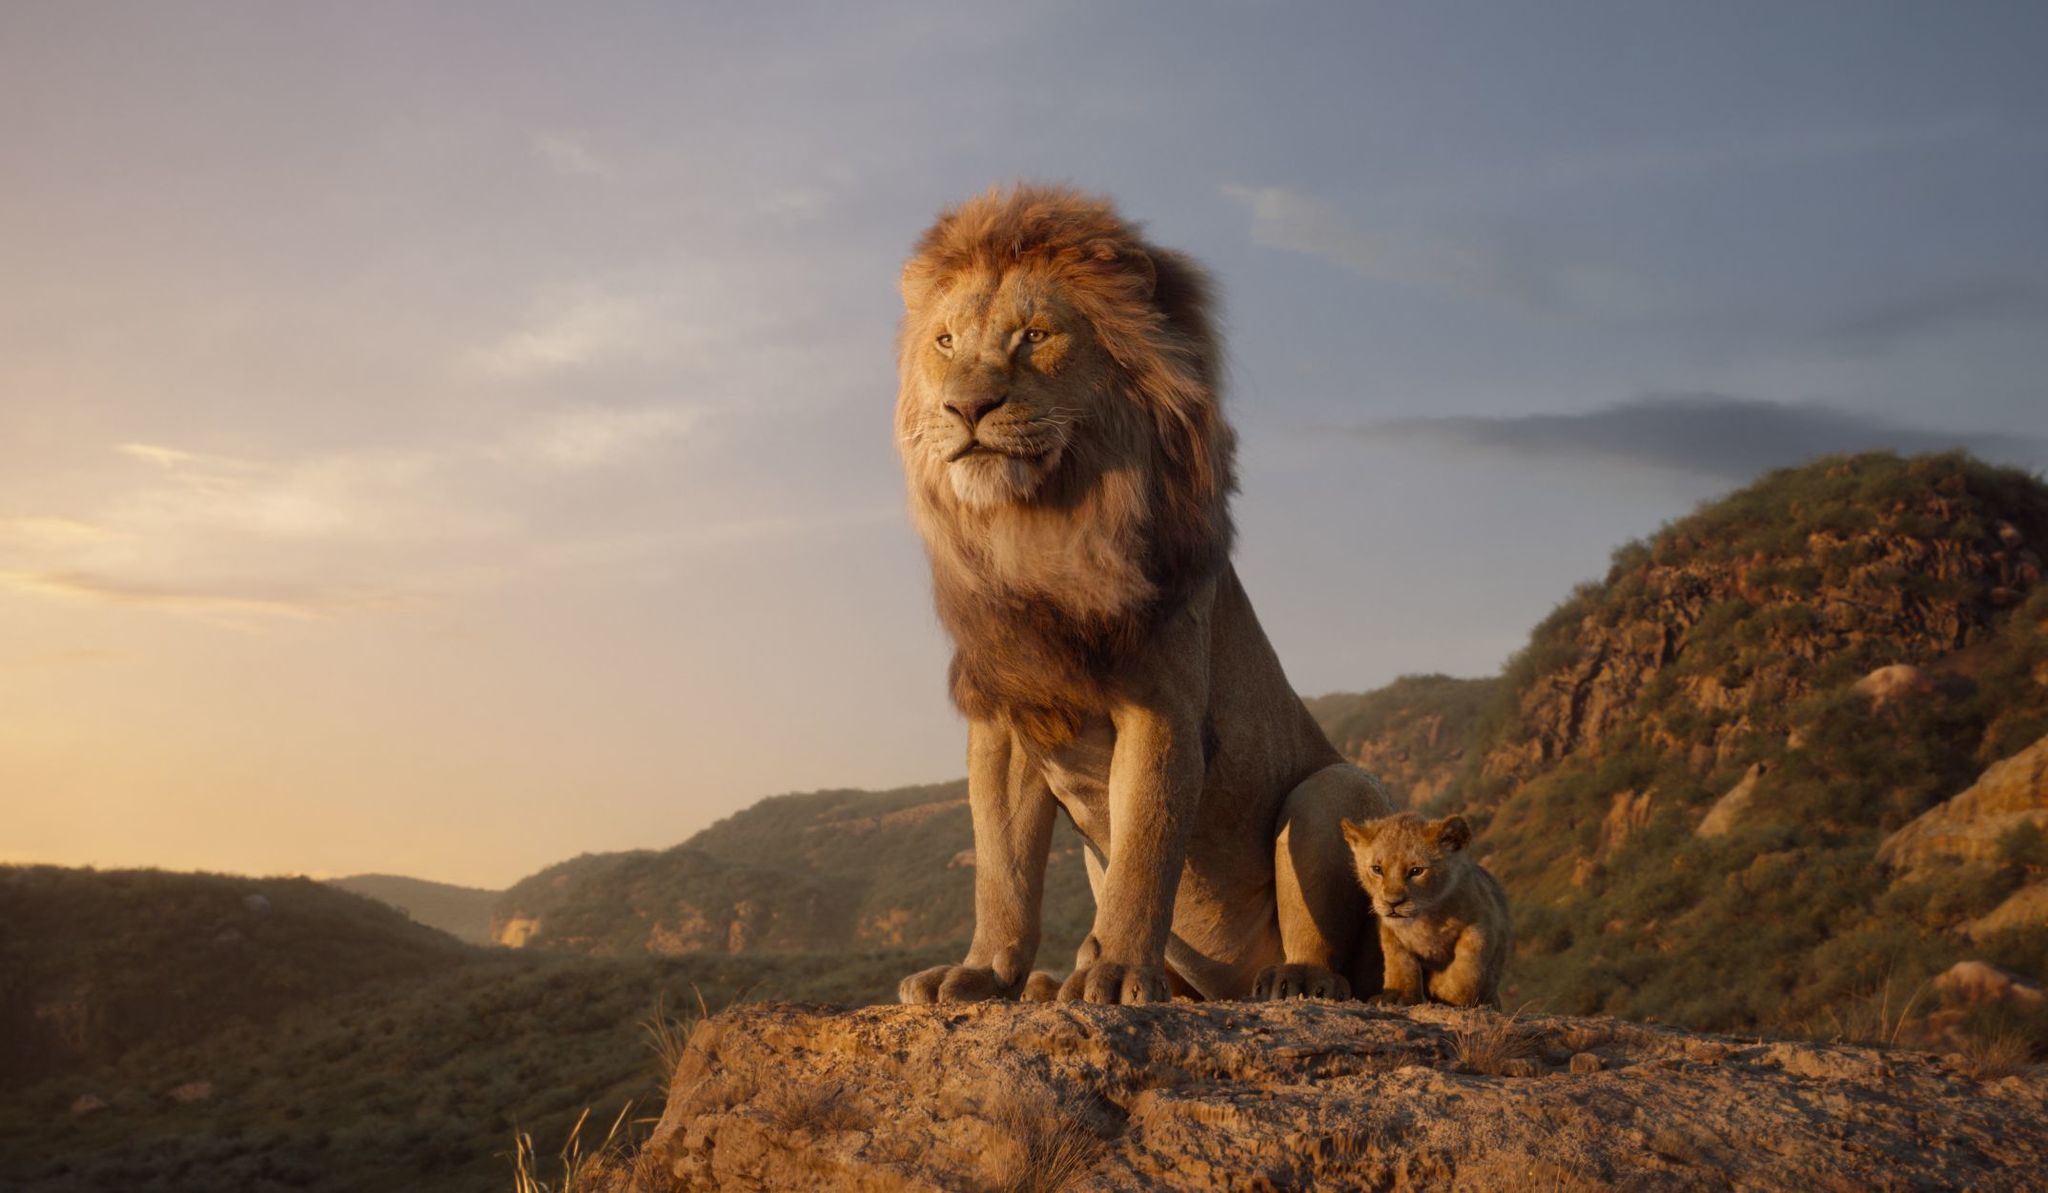

In [1]:
from IPython.display import Image
Image(filename='Lion_King.jpg')

<div class="alert alert-block alert-info" align=center><b></b>

# Problem Statement

Online reviews are important because they have become a reference point for buyers across the globe and because so many people trust them when making purchase decisions.


Reviews are also important for Search Engine Optimization (SEO). Having positive reviews is also another way through which you can improve a website’s Search Engine visibility. The more that people talk about a brand online, the greater its visibility to Search Engines, such as Google, Yahoo and Bing.


For the audience and booking websites, analysing reviews is significant in understanding reviewer opinion about the film. In movie booking websites, 90% of people first check out online reviews before purchasing tickets.
For the production house, analysing negative reviews can be useful for damage control.

<div class="alert alert-block alert-info" align=center><b></b>

# Business Understanding

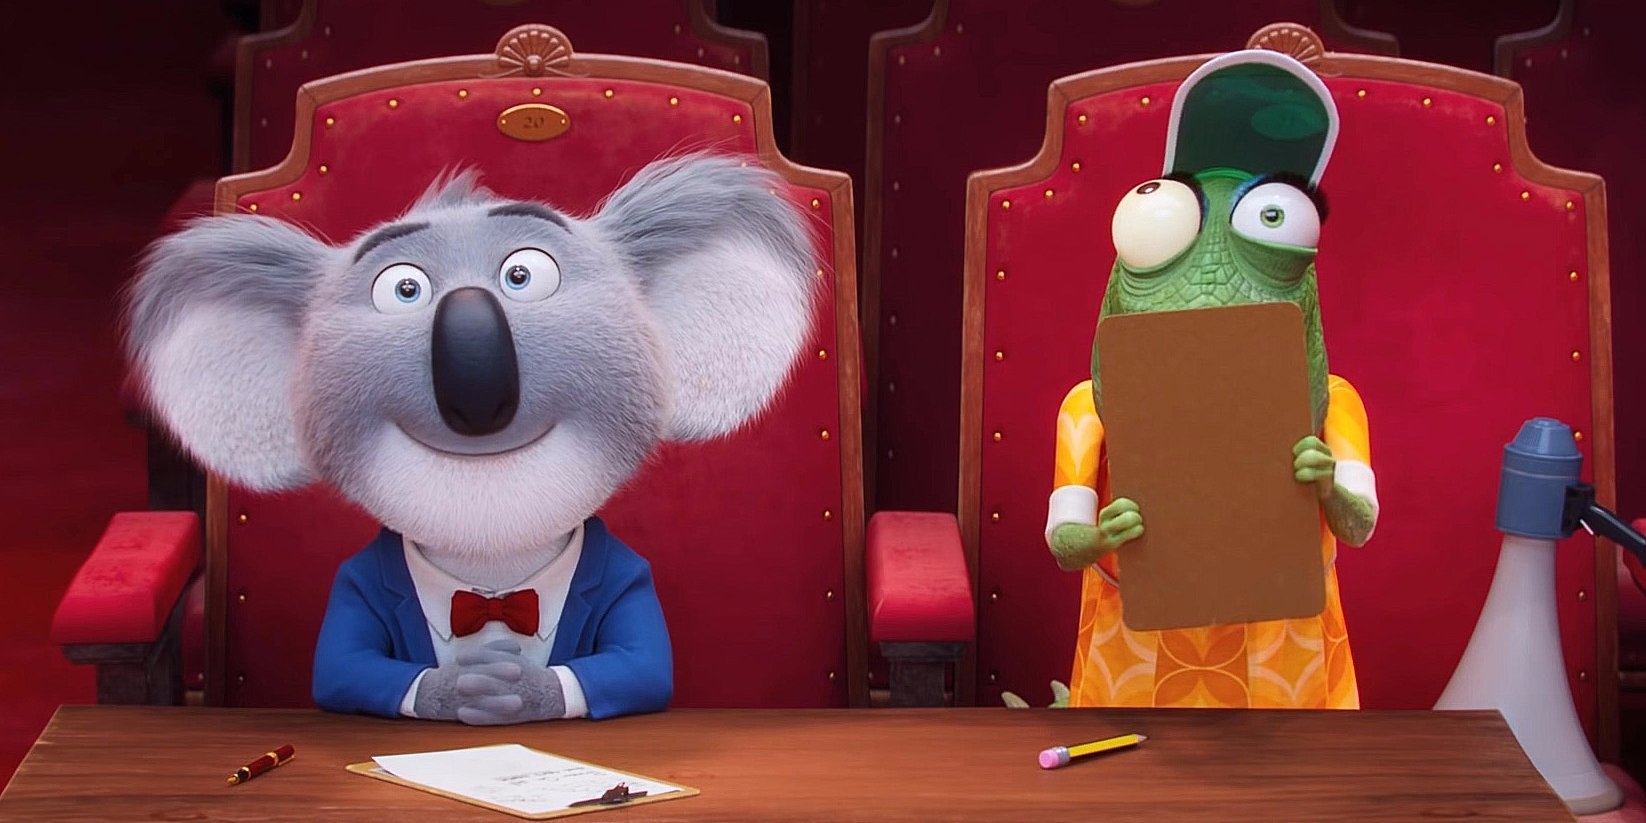

In [2]:
Image(filename='undefined.png')

THE LION KING(2019) is animated movie and it has their own viewers specially "kids" and people who like to understand about the animation as well director's work.
However they watch movies in two aspects: 
1st- They like to understand the type of animation used , 
2nd. They also would like to understand classification of movies in terms of sentiments.

After understanding the review and sentiments pertaining to globally, internal and external stakeholders can work accordingly for their upcoming movies and can do modifications to receive more business.

The review data available on rotten tometo website the same is real time data in text format, the same has been scrapped using web scrapping technique.

Further, based on other parameters/performance of the movie. movie can be rated as "outstanding" or "collapsed".
However here we shall be using terms of sentiment [Outstanding - Positive Sentiment (0)] and [Collapsed - Negative Sentiment (1)] 

Business can utilize these performance ratings to understand the review of customer sentiments towards the movie. The same will help them to improve their strategies, practices, build better satisfactory movie and many more imporvements to reach the oustanding performance.

<div class="alert alert-block alert-info" align=center><b></b>

# Understanding as a Data Scientist

My aim is to build a AI agent (model) for bank that will classify the review as positive and negative sentiment. Further, with the additional data provided i am suppose to classify bank as "Positive Sentiment" and "Negative Sentiment". 
This classification is based on which side the customer reviews and score they have given! If the reviews are close to positive sentiment then that movie is classified as outstanding.

<div class="alert alert-block alert-info" align=center><b></b>

# LET'S START

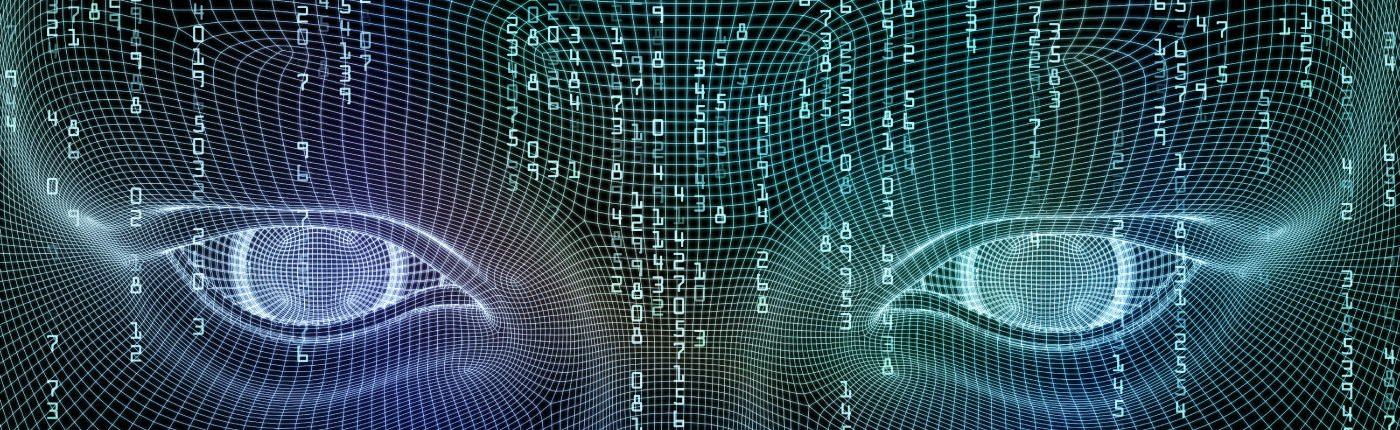

In [3]:
Image(filename='artificial_intelligence.jpg')

<div class="alert alert-block alert-info" align=center><b></b>
    
    My Name is TUSHIT DAVE and  I will take you the journey of sentiment Analysis of THE LION KING (2019) Movie 
    

# Table of Contents

Step -1 : Web Scrapping from Rotten Tometo

Step -2 : Import Libraries

Step -3 : Read Data

Step -4 : Summary Statistics and understanding of data techniques

Step -5 : Cleaning Data

Step -6 : Exploratory Data Analysis and Visulization along with Text Mining

Step -7 : LSA and LDA Modelling

### Step-1 : Web Scrapping from Rotten Tometo

In [4]:
import requests
import time
headers = {
 'Referer': 'https://www.rottentomatoes.com/m/the_lion_king_2019/reviews?type=user',\
 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, likeGecko) Chrome/74.0.3729.108 Safari/537.36',\
 'X-Requested-With': 'XMLHttpRequest',\
}
url = 'https://www.rottentomatoes.com/napi/movie/9057c2cf-7cab-317f-876f-e50b245ca76e/reviews/user'


payload = {
 'direction': 'next',
 'endCursor': '',
 'startCursor': '',
}

In [5]:
#Review, Reviewer_Name, Reviewer_ID, Rating, Creation Date 
# Coum Names
colNames = ['rating', 'review', 'displayName', 'displayImageUrl', 'isVerified', 'isSuperReviewer', 'hasSpoilers', 'hasProfanity', 'createDate', 'updateDate', 'user', 'score', 'timeFromCreation']
s = requests.Session()
ReviewDumpList = []
ReviewDump = {}

while True:
    r = s.get(url, headers=headers, params=payload)
    data = r.json()

    if not data['pageInfo']['hasNextPage']:
        break

    payload['endCursor'] = data['pageInfo']['endCursor']
    payload['startCursor'] = data['pageInfo']['startCursor']

    ReviewDumpList.append(data['reviews'])
    # print (type(data['reviews']))
    # for x in data['reviews']:
    #     user = x['user']['displayName']
    #     review = x['review']
    #     ReviewDump
    #     print(x.keys())

    time.sleep(5)

import pandas as pd
df = pd.DataFrame()
for eachReviewDict in ReviewDumpList:
    df1 = pd.DataFrame.from_dict(eachReviewDict)
    df = df.append(df1)
    df.reset_index(inplace=True)

### Step-2 : Import Libraries

In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

Python version: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.24.2
matplotlib version: 3.0.3
NumPy version: 1.16.2
SciPy version: 1.2.1
IPython version: 7.4.0
scikit-learn version: 0.20.3


In [7]:
# Libraries for text

# !pip install PyDrive
# !pip install gensim
# !pip install pyldavis
# !python -m spacy download en
from nltk.corpus import stopwords
from nltk.util import ngrams

from nltk.tokenize import TweetTokenizer
import datetime
import lightgbm as lgb
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, cross_val_score

#!pip install wordcloud
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier


from bs4 import BeautifulSoup
import requests as rq
import urllib.request as url
from bs4 import BeautifulSoup as bs

import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time

import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy
import gzip
import en_core_web_sm

import gensim
from gensim import corpora

import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

import warnings;
warnings.filterwarnings("ignore");

[nltk_data] Downloading package stopwords to C:\Users\Tushit
[nltk_data]     Dave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Visulization
import plotly
import plotly.offline as pyoff

import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\past\types\oldstr.py:33: DeprecationWarning:

invalid escape sequence \d



In [9]:
# !pip install vecstack
# !pip -q install shap
# !pip -q install lime
# !pip -q install eli5
# !pip install tpot
# !pip install hyperopt

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import random as rnd
pd.set_option('max_colwidth',400)
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# Importing Models
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing other tools
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV

### Step-3 : Read Data

In [10]:
df = pd.read_csv ('LionKingData.csv' , header = 0)

###### lets check how is data and format

In [11]:
df.head(5)

,Unnamed: 0,index,createDate,displayImageUrl,displayName,hasProfanity,hasSpoilers,isSuperReviewer,isVerified,rating,review,score,timeFromCreation,updateDate,user
0,0,0,2019-08-12T19:47:01.764Z,NaN,Annie,False,False,False,True,STAR_3_5,"it okay, but like the original one.",3.5,"Aug 12, 2019",2019-08-12T19:47:01.764Z,"{'userId': '0D674552-99DA-4D4A-B515-82A04A16A95F', 'realm': 'Fandango', 'displayName': 'Annie', 'accountLink': None}"
1,1,1,2019-08-12T19:24:21.444Z,NaN,EvD,False,False,False,False,STAR_5,loved the whole movie,5.0,"Aug 12, 2019",2019-08-12T19:24:21.444Z,"{'userId': '4D4B7E6C-5BE9-48BE-B014-B0B9224651E1', 'realm': 'Fandango', 'displayName': 'EvD', 'accountLink': None}"
2,2,2,2019-08-12T19:17:26.586Z,NaN,NaN,False,False,False,False,STAR_4,I genuinely don’t know where the poor critic reviews came in. I lost interest in seeing the film due to their poor reviews but eventually got around to seeing it and truly thought they did a magnificent job. I’m fully with the fans on this and score the movie a solid 83. Would be higher but Beyonce put a damper on things. She’s too much. Her macho girl routine is over the top and cheesy.,4.0,"Aug 12, 2019",2019-08-12T19:17:26.586Z,"{'userId': '944994530', 'realm': 'RT', 'displayName': None, 'accountLink': '/user/id/944994530'}"
3,3,3,2019-08-12T19:15:05.517Z,NaN,TG,False,False,False,True,STAR_5,"Awesome, amazing, great movie!",5.0,"Aug 12, 2019",2019-08-12T19:15:05.517Z,"{'userId': 'ab064d1b-3a23-4d95-b193-973c777b9485', 'realm': 'Fandango', 'displayName': 'TG', 'accountLink': None}"
4,4,4,2019-08-12T18:53:04.817Z,NaN,Sunshine,False,False,False,True,STAR_5,"Five stars. This was not only a treat for my husband and I but also our 6 year old grandson. So many positives. I kept on having to tell myself these were not real animals. The only thing that could use a little improvement is the ending. In relationship to the rest of the film, the ending moved along too quickly or perhaps I just didn't want it to end.",5.0,"Aug 12, 2019",2019-08-12T18:53:04.817Z,"{'userId': 'bbace413-6db0-45ac-9e90-08b70cc3bbf7', 'realm': 'Fandango', 'displayName': 'Sunshine', 'accountLink': None}"


### Step-4 :Summary Statistics and understanding of data techniques

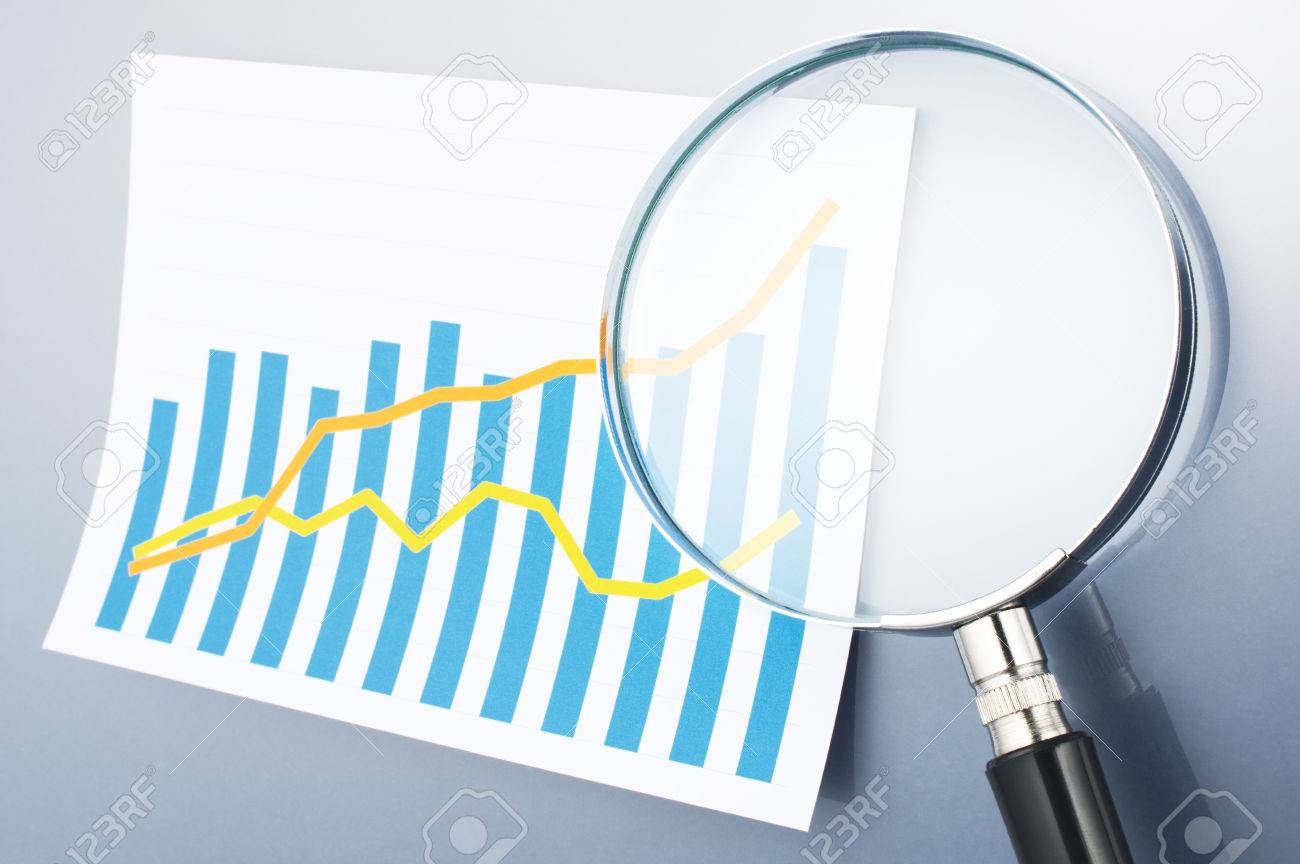

In [12]:
Image(filename='data-look_stat.jpg')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 15 columns):
Unnamed: 0          3240 non-null int64
index               3240 non-null int64
createDate          3240 non-null object
displayImageUrl     238 non-null object
displayName         3099 non-null object
hasProfanity        3240 non-null bool
hasSpoilers         3240 non-null bool
isSuperReviewer     3240 non-null bool
isVerified          3240 non-null bool
rating              3240 non-null object
review              3240 non-null object
score               3240 non-null float64
timeFromCreation    3240 non-null object
updateDate          3240 non-null object
user                3240 non-null object
dtypes: bool(4), float64(1), int64(2), object(8)
memory usage: 291.2+ KB


In [14]:
df.dtypes

Unnamed: 0            int64
index                 int64
createDate           object
displayImageUrl      object
displayName          object
hasProfanity           bool
hasSpoilers            bool
isSuperReviewer        bool
isVerified             bool
rating               object
review               object
score               float64
timeFromCreation     object
updateDate           object
user                 object
dtype: object

In [15]:
df.describe(include = 'all')

,Unnamed: 0,index,createDate,displayImageUrl,displayName,hasProfanity,hasSpoilers,isSuperReviewer,isVerified,rating,review,score,timeFromCreation,updateDate,user
count,3240.000000,3240.000000,3240,238,3099,3240,3240,3240,3240,3240,3240,3240.000000,3240,3240,3240
unique,NaN,NaN,3240,238,2656,2,2,2,2,10,3236,NaN,14,3240,3240
top,NaN,NaN,2019-08-07T00:26:45.662Z,https://graph.facebook.com/v3.3/100000421016440/picture,Google,False,False,False,True,STAR_5,Loved everything about this movie!,NaN,"Aug 01, 2019",2019-08-07T00:26:45.662Z,"{'userId': '86e611e1-a27e-4d79-bb16-3fd6a7368a3e', 'realm': 'Fandango', 'displayName': 'Unknown', 'accountLink': None}"
freq,NaN,NaN,1,1,14,3205,3238,3239,2367,1503,2,NaN,378,1,1
mean,1619.500000,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.941049,NaN,NaN,NaN
std,935.451763,2.872725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.306731,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN
25%,809.750000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN
50%,1619.500000,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,NaN,NaN,NaN
75%,2429.250000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN


1)  From above table we can infer that few columns i.e. Unnamed , Index , Display Image URL is of no use.

2)  Few Reviers has been updated their views many a times, We will check the same through visulisation.

3)  Rating and Star both are same , We can drop Rating.

4)  Few Display Names are missing , hmmm !! . No point of impute the same because reviewer Id / User ID is more important.


In [16]:
print("No. of Columns = {}".format(len(df.columns)))

print('No. of Records = \n{}'.format(df.count()))

No. of Columns = 15
No. of Records = 
Unnamed: 0          3240
index               3240
createDate          3240
displayImageUrl      238
displayName         3099
hasProfanity        3240
hasSpoilers         3240
isSuperReviewer     3240
isVerified          3240
rating              3240
review              3240
score               3240
timeFromCreation    3240
updateDate          3240
user                3240
dtype: int64


In [17]:
df.columns

Index(['Unnamed: 0', 'index', 'createDate', 'displayImageUrl', 'displayName',
       'hasProfanity', 'hasSpoilers', 'isSuperReviewer', 'isVerified',
       'rating', 'review', 'score', 'timeFromCreation', 'updateDate', 'user'],
      dtype='object')

In [18]:
df.shape

(3240, 15)

### Step-5 : Clean Data

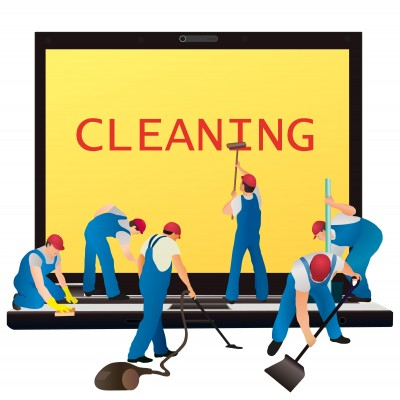

In [19]:
Image(filename='cleaning.jpg')

In [20]:
#DROPPING "Unnamed_0" "df_index" "updateDate" "rating" "displayImageUrl" "timeFromCreation"

df.drop(['Unnamed: 0','index','timeFromCreation','displayImageUrl','updateDate','rating'],axis =1,inplace = True)

In [21]:
# separating userId from name
df["user"]= df["user"].str.split("realm", n = 1, expand = True)

In [22]:
# displayName - > Reviewer Name isVerified - > Verified hasProfanity -> Profanity hasSpoilers - > Spoilers isSuperReviewer-> Super Reviewer createDate -> Review Date
df.rename(columns = {"user": "Reviewer ID" , "displayName":"Reviewer Name" ,'createDate': 'Review Date', 'hasProfanity': 'Profanity',
                    'hasSpoilers':'Spoilers' ,'isSuperReviewer': 'SuperReviewer' , 'isVerified':'Verified'},inplace = True)

In [23]:
# Checking NA Value
df.isna().sum()

Review Date        0
Reviewer Name    141
Profanity          0
Spoilers           0
SuperReviewer      0
Verified           0
review             0
score              0
Reviewer ID        0
dtype: int64

As we can see, Few names are missing however the same has no value in creating model hence imputation is not taking place for the same

In [24]:
df.shape

(3240, 9)

In [25]:
df['Review Date'] = pd.to_datetime(df['Review Date'])
df['Date'] = df['Review Date'].dt.strftime('%m-%d')
df['Month'] = df['Review Date'].dt.strftime('%m')

# dropping creation date of review after splitting into month and date
df.drop(['Review Date'], axis=1 , inplace = True)

In [26]:
#Labelling score and creating column called sentiment

df['sentiment'] = [0 if x>3 else 1 for x in df['score']] # As per the problem statement "0" is +ve sentiment and "1" is negative sentiment

In [27]:
df.head(2)

,Reviewer Name,Profanity,Spoilers,SuperReviewer,Verified,review,score,Reviewer ID,Date,Month,sentiment
0,Annie,False,False,False,True,"it okay, but like the original one.",3.5,"{'userId': '0D674552-99DA-4D4A-B515-82A04A16A95F', '",08-12,08,0
1,EvD,False,False,False,False,loved the whole movie,5.0,"{'userId': '4D4B7E6C-5BE9-48BE-B014-B0B9224651E1', '",08-12,08,0


In [131]:
# Let's remove if any Null Value Inside the text column
df = df[~df['review'].isnull()]

def preprocess(review):
    review = review.str.replace("(<br/>)", "")
    review = review.str.replace('(<a).*(>).*(</a>)', '')
    review = review.str.replace('(&amp)', '')
    review = review.str.replace('(&gt)', '')
    review = review.str.replace('(&lt)', '')
    review = review.str.replace('(\xa0)', ' ')  
    return review
## Preprocessing of review
df['review'] = preprocess(df['review'])

### Step -6 : Exploratory Data Analysis and Visulization along with Text Mining

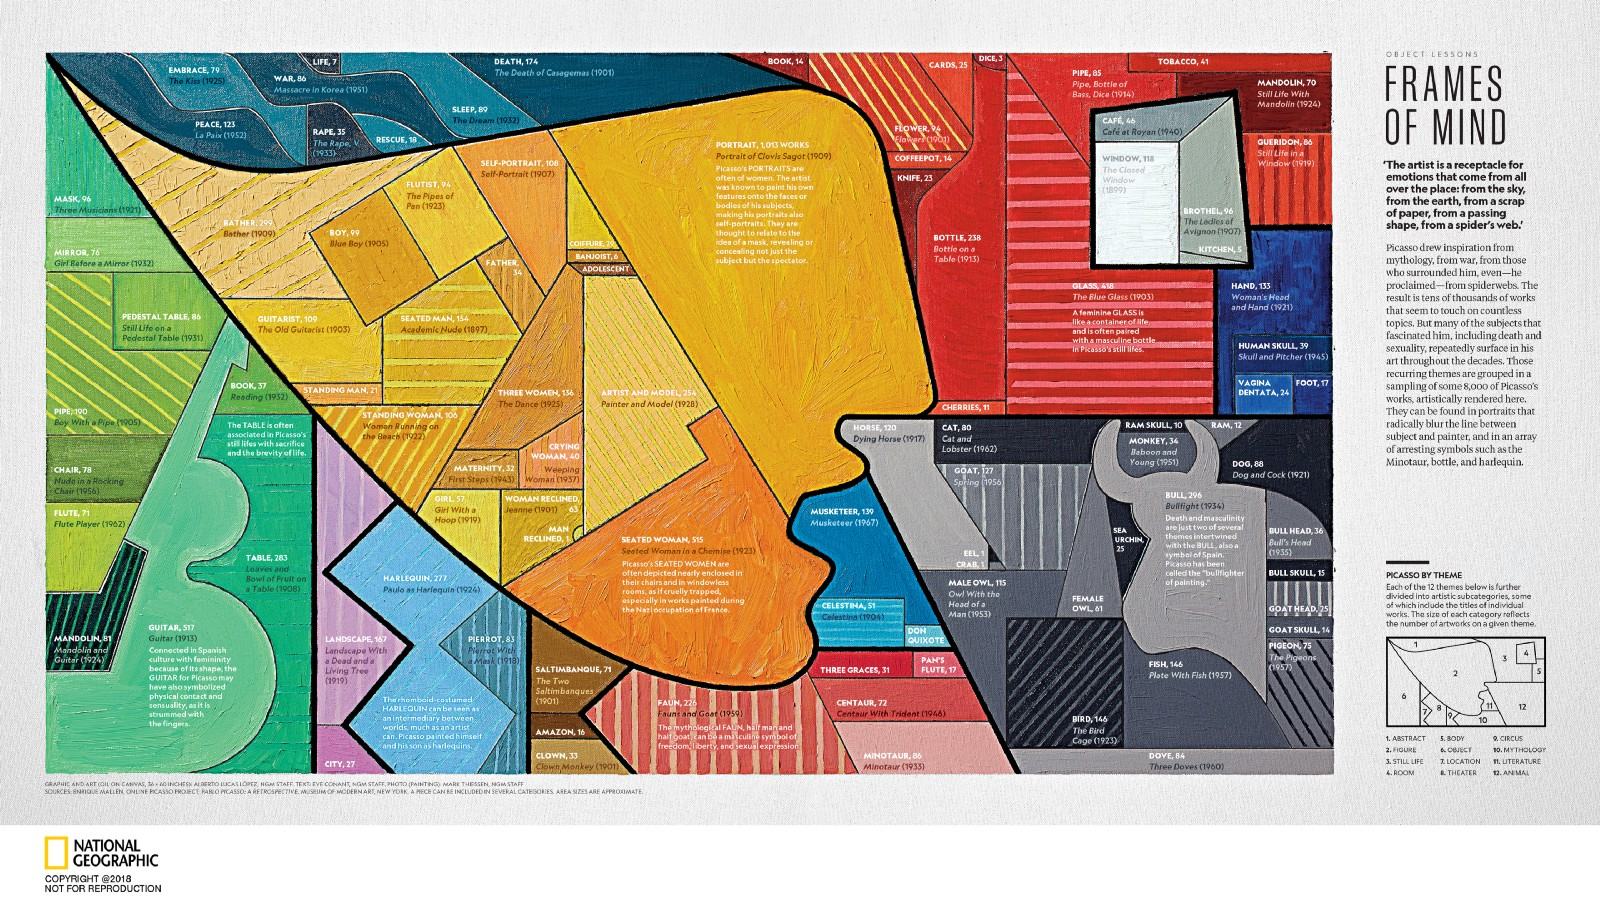

In [28]:
Image(filename='EDA.jpeg')

<div class="alert alert-block alert-info" align=center><b></b>

##### Let's Play Around with "review" variable 
##### Explore!!      how it is ?

In [29]:
# Checking Average count for boolean varibales and review

print('Average count of hasProfanity per sentence in df is {0:.0f}.'.format(df['Profanity'].count().mean()))
print('Average count of review per sentence in df is {0:.0f}.'.format(df['review'].count().mean()))
print('Average count of hasSpoilers per sentence in df is {0:.0f}.'.format(df['Spoilers'].count().mean()))
print('Average count of isSuperReviewer per sentence in df is {0:.0f}.'.format(df['SuperReviewer'].count().mean()))
print('Average count of isVerified per sentence in df is {0:.0f}.'.format(df['Verified'].count().mean()))

Average count of hasProfanity per sentence in df is 3240.
Average count of review per sentence in df is 3240.
Average count of hasSpoilers per sentence in df is 3240.
Average count of isSuperReviewer per sentence in df is 3240.
Average count of isVerified per sentence in df is 3240.


In [30]:
# lets check average length of review sentences
print('Average word length of review in df_review is {0:.0f}.'.format(np.mean(df['review'].apply(lambda x: len(x.split())))))

Average word length of review in df_review is 26.


In [33]:
#!pip install textblob
from textblob import TextBlob

In [132]:
#Creating New variable called " Polarity" which is giving insights of review column and assigning weight
df['polarity'] = df['review'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['review'].astype(str).apply(len)
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))

In [35]:
# Lets print randomly 5 positive sentiments
print('5 random reviews with the highest positive sentiment polarity: \n')
print('***********************************************************************************************************************')
cl = df.loc[df.polarity == 0, ['review']].sample(5).values
for c in cl:
    print(c[0])
print('***********************************************************************************************************************')

5 random reviews with the highest positive sentiment polarity: 

***********************************************************************************************************************
Me encanto pumba y timón
There was a couple lines from the animated film that got let out.
I did not like how you made the hyena Ed talk when in the animated series he did not talk. Also, I did not like when you used "Be Our Guest" for the distraction song.
The story dragged on.
Hated Beyoncs voice!  Everything else, great!
***********************************************************************************************************************


In [36]:
#Printing top 5 negative sentiments randomly
print('5 random reviews with the highest negative sentiment polarity: \n')
print('***********************************************************************************************************************')
cl = df.loc[df.polarity == 1, ['review']].sample(5).values
for c in cl:
    print(c[0])
print('***********************************************************************************************************************')

5 random reviews with the highest negative sentiment polarity: 

***********************************************************************************************************************
Thought it was great!
Excellent graphics and scenery, the animals were so life like.
As always a great family movie from Disney!
Cinematography was AWESOME!
Absolutely loved it. It felt a though I was running with the animals!!
***********************************************************************************************************************


Wowwww !!! Look at this, It is giving positive for the "Human understanding"

In [37]:
# Let's develope tri-gram for positive reviews
text_pos = ' '.join(df.loc[df.sentiment == 0, 'review'].values)
text_trigrams_pos = [i for i in ngrams(text_pos.split(), 3)]

# Let's see for example most common trigrams for positive review
Counter(text_trigrams_pos).most_common(30)

[(('to', 'the', 'original'), 93),
 (('true', 'to', 'the'), 69),
 (('The', 'movie', 'was'), 55),
 (('of', 'the', 'original'), 54),
 (('I', 'loved', 'the'), 53),
 (('It', 'was', 'a'), 49),
 (('was', 'a', 'great'), 42),
 (('The', 'Lion', 'King'), 38),
 (('as', 'good', 'as'), 38),
 (('from', 'the', 'original'), 37),
 (('thought', 'it', 'was'), 37),
 (('some', 'of', 'the'), 35),
 (('the', 'original', 'but'), 34),
 (('good', 'as', 'the'), 33),
 (('it', 'was', 'a'), 33),
 (('the', 'movie', 'was'), 33),
 (('the', 'animated', 'version'), 32),
 (('I', 'thought', 'it'), 32),
 (('the', 'original', 'and'), 31),
 (('to', 'see', 'it'), 29),
 (('to', 'the', 'original.'), 27),
 (('the', 'original', 'animated'), 27),
 (('as', 'the', 'original'), 26),
 (('a', 'lot', 'of'), 26),
 (('I', 'really', 'enjoyed'), 25),
 (('I', 'loved', 'it!'), 25),
 (('I', 'liked', 'the'), 24),
 (('better', 'than', 'the'), 24),
 (('but', 'it', 'was'), 24),
 (('remake', 'of', 'the'), 23)]

In [38]:
# Let's develope tri-gram for positive reviews after removing stopwards
text_pos = ' '.join(df.loc[df.sentiment == 0, 'review'].values)
text_pos_stop = [i for i in text_pos.split() if i not in stopwords.words('english')]
text_trigrams_pos = [i for i in ngrams(text_pos_stop, 3)]
Counter(text_trigrams_pos).most_common(30)

[(('The', 'Lion', 'King'), 38),
 (('I', 'really', 'enjoyed'), 25),
 (('I', 'loved', 'it!'), 25),
 (('I', 'loved', 'it.'), 20),
 (('The', 'animals', 'looked'), 16),
 (('stayed', 'true', 'original'), 16),
 (('James', 'Earl', 'Jones'), 14),
 (('I', 'really', 'liked'), 12),
 (('I', 'felt', 'like'), 10),
 (('The', 'movie', 'great.'), 9),
 (('I', 'would', 'recommend'), 9),
 (('I', 'absolutely', 'loved'), 9),
 (('The', 'Lion', 'King.'), 9),
 (('Very', 'well', 'done.'), 8),
 (('I', 'would', 'definitely'), 8),
 (('Lion', 'King.', 'I'), 8),
 (('I', 'loved', 'movie.'), 8),
 (('I', 'loved', 'movie'), 8),
 (('really', 'enjoyed', 'it.'), 7),
 (('go', 'see', 'again.'), 7),
 (('It', 'brought', 'back'), 7),
 (('I', 'would', 'go'), 7),
 (('I', 'thought', 'great'), 7),
 (('I', 'loved', 'everything'), 7),
 (('Lion', 'King', 'movie'), 7),
 (('It', 'well', 'done'), 6),
 (('My', 'kids', 'loved'), 6),
 (('loved', 'it.', 'It'), 6),
 (('I', 'glad', 'I'), 6),
 (('I', 'thoroughly', 'enjoyed'), 6)]

In [39]:
# Let's develope tri-gram for negative reviews
text_neg = ' '.join(df.loc[df.sentiment == 1, 'review'].values)
text_trigrams_neg = [i for i in ngrams(text_neg.split(), 3)]

# Let's see for example most common trigrams for positive review
Counter(text_trigrams_neg).most_common(30)

[(('of', 'the', 'original'), 47),
 (('some', 'of', 'the'), 34),
 (('of', 'the', 'original.'), 27),
 (('to', 'the', 'original'), 25),
 (('a', 'lot', 'of'), 25),
 (('as', 'good', 'as'), 24),
 (('The', 'Lion', 'King'), 24),
 (('from', 'the', 'original'), 22),
 (('good', 'as', 'the'), 19),
 (('as', 'the', 'original.'), 18),
 (('the', 'original.', 'The'), 18),
 (('shot', 'for', 'shot'), 16),
 (('live', 'up', 'to'), 15),
 (('would', 'have', 'been'), 14),
 (('voice', 'acting', 'was'), 14),
 (('The', 'original', 'was'), 14),
 (('this', 'movie', 'is'), 14),
 (('remake', 'of', 'the'), 14),
 (('James', 'Earl', 'Jones'), 14),
 (('up', 'to', 'the'), 14),
 (('in', 'the', 'original'), 14),
 (('the', 'original', 'movie.'), 13),
 (('the', 'animated', 'version.'), 13),
 (('the', 'original', 'and'), 13),
 (('of', 'the', 'movie'), 13),
 (('it', 'was', 'a'), 13),
 (('the', 'original', 'was'), 13),
 (('the', 'voice', 'acting'), 12),
 (('the', 'movie', 'was'), 12),
 (('most', 'of', 'the'), 12)]

In [42]:
# Let's develope tri-gram for negative reviews after removing stopwards
text_neg = ' '.join(df.loc[df.sentiment == 1, 'review'].values)
text_neg_stop = [i for i in text_neg.split() if i not in stopwords.words('english')]
text_trigrams_neg = [i for i in ngrams(text_neg_stop, 3)]
Counter(text_trigrams_neg).most_common(30)

[(('The', 'Lion', 'King'), 24),
 (('James', 'Earl', 'Jones'), 14),
 (('I', 'felt', 'like'), 11),
 (('The', 'voice', 'acting'), 9),
 (('The', 'Lion', 'King,'), 9),
 (('felt', 'like', 'I'), 8),
 (('like', 'I', 'watching'), 7),
 (('It', 'felt', 'like'), 7),
 (('original', 'Lion', 'King'), 7),
 (('I', 'didn’t', 'like'), 6),
 (('original', 'much', 'better.'), 6),
 (('I', 'didnt', 'like'), 5),
 (('shot', 'shot', 'remake'), 5),
 (('I', 'feel', 'like'), 5),
 (('The', 'original', 'much'), 5),
 (('The', 'Jungle', 'Book'), 4),
 (('Earl', 'Jones', 'voice'), 4),
 (('new', 'Lion', 'King'), 4),
 (('shot', 'shot', 'remake,'), 4),
 (('"Can', 'You', 'Feel'), 4),
 (('James', 'Earl', 'Jones,'), 4),
 (('I', 'still', 'prefer'), 4),
 (('Just', 'watch', 'original.'), 4),
 (('I', 'liked', 'cartoon'), 4),
 (('cartoon', 'much', 'better.'), 3),
 (('Disney', 'needs', 'stop'), 3),
 (('feel', 'love', 'tonight"'), 3),
 (('Lion', 'King', 'remake'), 3),
 (('animals', 'look', 'real,'), 3),
 (('The', 'CGI', 'looks'), 3)]

In [45]:
# Importing pandas profiling for quick review of newly created variables i.e. polarity, review Length,word count and previously created sentiment
import pandas_profiling
df.profile_report()

In [46]:
# # creating HTML view for the easy access and quick introduction
profile = df.profile_report(title='Pandas Profiling Report')
profile.to_file("LION KING profiling1.html")

In [47]:
# Let's take a look, How new columns are look like
df.head(3)

,Reviewer_Name,Profanity,Spoilers,SuperReviewer,Verified,review,score,Reviewer_ID,Date,Month,sentiment,polarity,review_len,word_count
0,Annie,False,False,False,True,"it okay, but like the original one.",3.5,"{'userId': '0D674552-99DA-4D4A-B515-82A04A16A95F', '",08-12,08,0,0.4375,35,7
1,EvD,False,False,False,False,loved the whole movie,5.0,"{'userId': '4D4B7E6C-5BE9-48BE-B014-B0B9224651E1', '",08-12,08,0,0.4500,21,4
2,NaN,False,False,False,False,I genuinely don’t know where the poor critic reviews came in. I lost interest in seeing the film due to their poor reviews but eventually got around to seeing it and truly thought they did a magnificent job. I’m fully with the fans on this and score the movie a solid 83. Would be higher but Beyonce put a damper on things. She’s too much. Her macho girl routine is over the top and cheesy.,4.0,"{'userId': '944994530', '",08-12,08,0,0.0925,391,75


In [48]:
print(df.polarity.min())
print(df.polarity.max())
print(df.word_count.min())
print(df.word_count.max())
print(df.review_len.min())
print(df.review_len.max())

-1.0
1.0
2
776
15
4627


In [49]:
print("===============================================================================================================================")
print("==============================================================================================================================")
print("==============================================================================================================================")

<div class="alert alert-block alert-info" align=center><b></b>
    
    ----------> Let's start doing some EDA on text data by Word Cloud

#### **********Filtering out Negative Movie reviews*********

In [50]:
neg_phrases = df[df.sentiment == 1]
neg_words = []
for t in neg_phrases.review:
    neg_words.append(t)
neg_words[:4]
print("*******************************************************************************************************************")

print("As we can see, few Negative finally came out of using append technique")

*******************************************************************************************************************
As we can see, few Negative finally came out of using append technique


In [51]:
neg_text = pd.Series(neg_words).str.cat(sep=' ')
neg_text[:100]
print("*******************************************************************************************************************")

print("HAHA :) , This looks like most negative sentence from the review")

*******************************************************************************************************************
HAHA :) , This looks like most negative sentence from the review


In [52]:
for t in neg_phrases.review[:300]:
    if 'good' in t:
        print(t)

The movie lacked Disney magic and it had very few silly/fun moments. Key songs lacked good singing ("Be Prepared" was downright awful) and the overall music was anemic. Instead of fun, it felt like I was watching a National Geographic special with talking animals. I want my money back.
It was a good movie and people that have never seen the first Lion King will definitely enjoy it however I preferred the original movie over this one.
Outline was good, our group didnt feel a connection with the characters
The graphical design and physics were brilliant. Voice acting was mostly good, but fact is, the character design was such that no story was given through characters, you could sit with your eyes closed and the movie would have been just as good. It looked like some one went out and filmed some animals in the wild, and then just voiced over them.

Characters were incredibly realistic, but expressionless and lifeless. Absolute mistake to make it this way, completely ruined the movie.
the

How can they kill “Be Prepared” like that?! Seriously! Some of the acting was stale, but visually it was done very well. And for the love of all that’s good with future live-action Disney adaptation films... STOP RUSHING THE PLOT!!! The Jungle Book is still my #1 Pick for Best Live-Action Adaptation
Timone was the only thing good about this movie. I found it lacked any real emotion. Not sure i like the theme of bringing animated movies to real action. Also the cinematography was really off. You think they could have found a much more appealing location. Just seemed so muted. 
Disappointing. Scars song was the most disappointing part, but overall it just wasnt much different or any better than the original. Beyonc did a nice job, and the other voices were good as well, but the story was lacking.
It lacked the emotion of the original and did not add enough new things to make it its own version.
The CGI looks pretty damn good but the fact it is using the look of real animals makes none of

Well, the original was better.  It's fine, and ultimately impressive.  Really, there is a lot to admire about the movie, but still it can't escape the shadow of the original.  The weird thing is despite being longer a lot of times it feels like it's rushing through the beats of the original.  Most notably, Mufasa's death scene (spoiler's I guess) feels weirdly rushed.  I remember in the original there was time dwelling on Simba looking at the body and begging for Mufasa to get up.  Here, he just kinda looks at it, sniffles a bit, and the scene moves on.  Look I'm not saying it needs to be a shot for shot remake, but if you are going to go through the effort of doing the exact same scenes, either do them better, or do them at least as good, don't just rush through them to check off a box.  That's this films biggest flaw, and it really did bother me.  It lives under the shadow of the original often doing things because "the original did it" without really seeming to have an understanding

So, we can very well see, even if the texts contain words like "good", it is a negative sentiment because it indicates that the movie is NOT a good movie.

In [53]:
# As we have seen earlier , lets check positive senetence from the movie
pos_phrases = df[df.sentiment == 0] ## 0 is positive sentiment
pos_string = []
for t in pos_phrases.review:
    pos_string.append(t)
pos_text = pd.Series(pos_string).str.cat(sep=' ')
pos_text[:100]

'it okay, but like the original one. loved the whole movie I genuinely don’t know where the poor crit'

#### ****World Cloud for the Movie review****

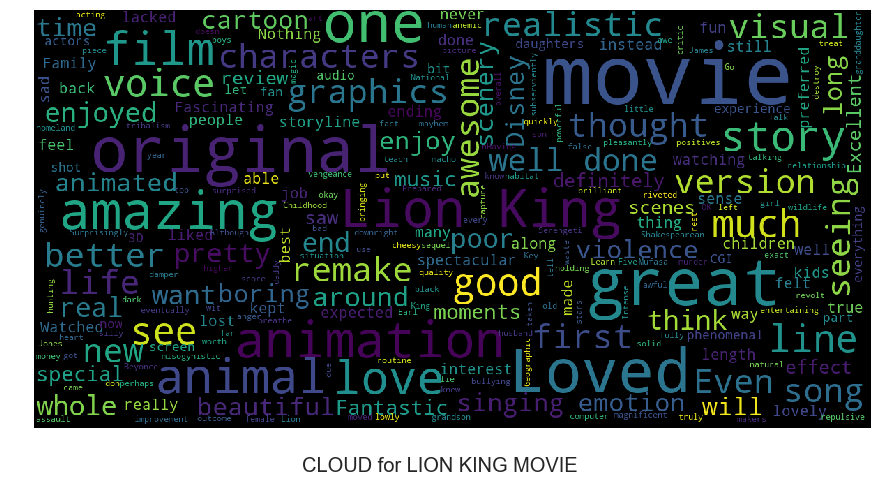

In [54]:

from wordcloud import WordCloud

mpl.rcParams['font.size']=12     # font size            
mpl.rcParams['savefig.dpi']=100          
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = 'CLOUD for LION KING MOVIE'):
    wordcloud = WordCloud(
        background_color='black', # background color is set to black
        max_words=300, # maximum number of words
        max_font_size=40, # maximum font size is 40
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df["review"])

# from wordcloud import WordCloud
# wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
# plt.figure(figsize=(12,10))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

Some of the big words can be interpreted quite neutral which can reflect in postitive and negative sentiment analysis, such as "Original","Movie", etc. We can see some of the words in smaller size make sense to be in negative movie reviews like "bad", "beyonce", "disappointed", etc.

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2))
cvector.fit(df.review)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [56]:
len(cvector.get_feature_names())

38851

It looks like count vectorizer has extracted 38851 words out of the corpus. 

##### ******Getting term frequency for each class***** 

In [57]:
# Term Frequency of "Negative" Sentiment
# Let's define
neg_matrix = cvector.transform(df[df.sentiment == 1].review)
pos_matrix = cvector.transform(df[df.sentiment == 0].review)

In [58]:
# Creating dataframe and doing vectorization of words and checking
neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])

In [59]:
# Lets check term frequency of Negative words
neg_tf.head()

,Terms,negative
0,the,2749
1,it,995
2,and,957
3,was,951
4,to,808


In [60]:
neg_tf_df = neg_tf.set_index('Terms')
neg_tf_df.head()

,negative
Terms,
the,2749
it,995
and,957
was,951
to,808


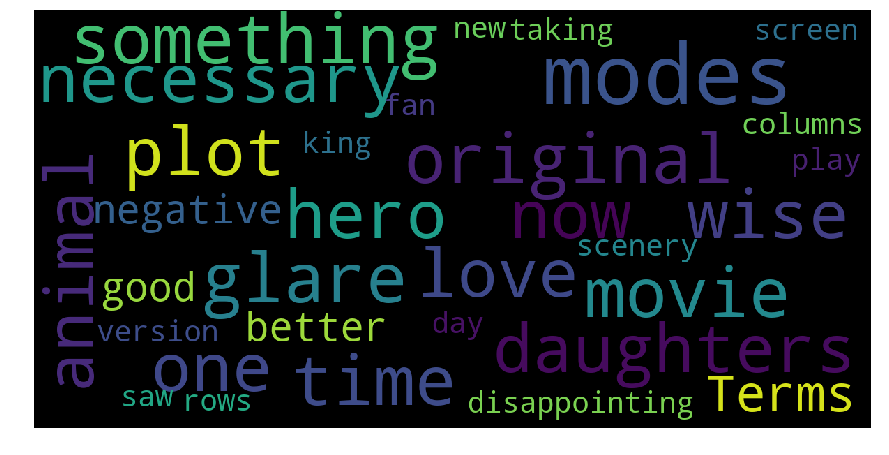

In [61]:
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(neg_tf)

Finally we can see some good results after some Exploration.
As we can see few Big words providing some negative sentiments i.e. Necessary, Something , disappointing etc... However still we can se some collinearity here since those words might have given in a scarcastic way or might have jumbled with postive reviews


In [62]:
#Term Frequency of " Positive" Sentiment
pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')
pos_words_tf_df.head()

,positive
Terms,
the,3558
it,1887
was,1381
and,1370
movie,1172


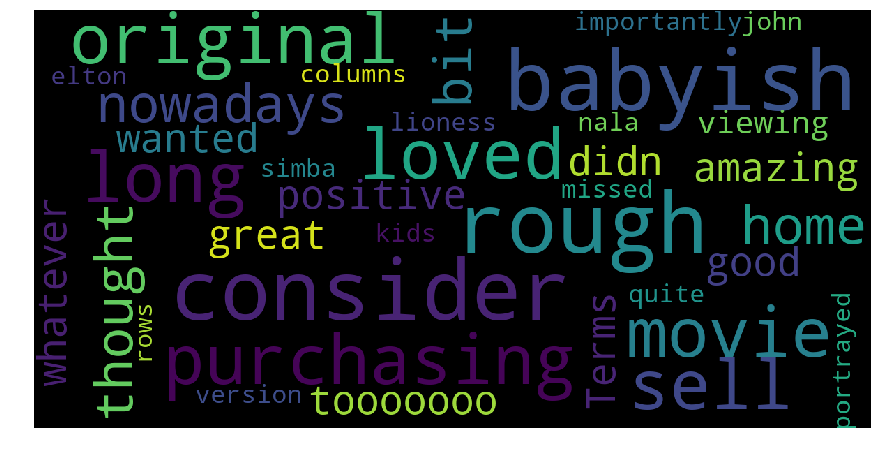

In [63]:
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(pos_words_tf)

In [64]:
# concatenating both the sentiments
term_freq_df = pd.concat([neg_tf_df,pos_words_tf_df],axis =1)

In [65]:
#Total Term Frequency of both the 2 sentiment classes
term_freq_df['total'] = term_freq_df['negative'] +  term_freq_df['positive'] 
term_freq_df.sort_values(by='total', ascending=False).head(20)

,negative,positive,total
the,2749,3558,6307
it,995,1887,2882
was,951,1381,2332
and,957,1370,2327
to,808,996,1804
movie,515,1172,1687
of,762,774,1536
original,497,655,1152
the original,437,595,1032
but,412,520,932


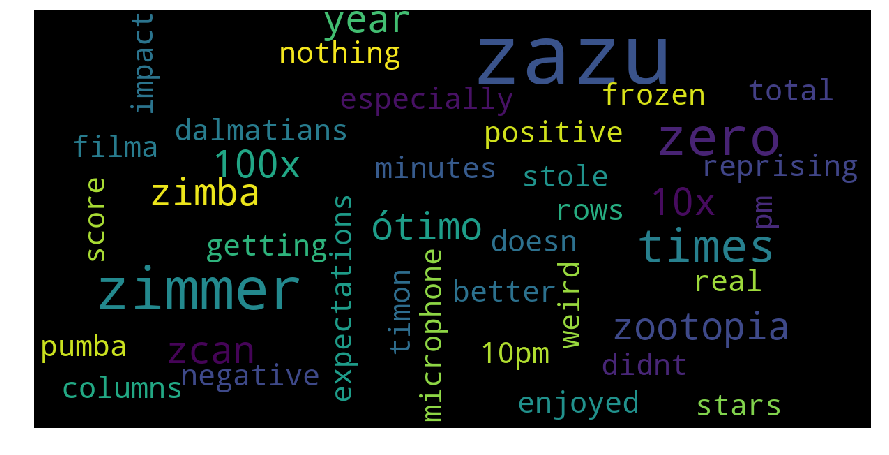

In [66]:
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(term_freq_df)

After concatenation result is something different here , As we can see 

Text(0.5, 1.0, 'Top 200 phrases in movie reviews')

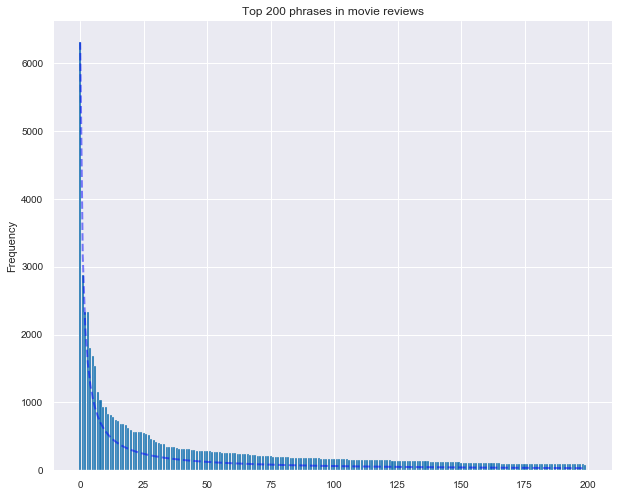

In [67]:
# Frequency plot of top frequent 200 phrases in movie reviews
y_pos = np.arange(200)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:200], align='center', alpha=1)
plt.plot(y_pos, expected_zipf, color='b', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 200 phrases in movie reviews')

##### Plot of Absolute frequency of phrases against their rank

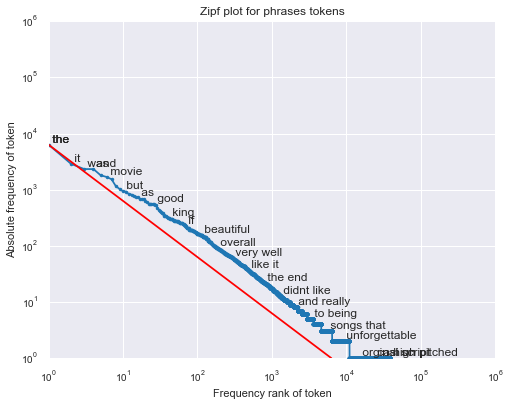

In [68]:
#Plot of Absolute frequency of phrases against their rank
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for phrases tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

We can clearly see that words like "the", "it","movie","but", etc are much higher in frequency but has been ranked less as they don't have any significance regarding the sentiment of the movie review. On the other hand, some words like "original","high" have been given higher rank as they are very less frequent in the document and seems to be significant related to the sentiment of a movie.

<div class="alert alert-block alert-info" align=start><b></b>
    
    ----------> It's time !!!! , for Tokens Visualisation

#####  **********let's explore about how different the tokens in two different classes(positive, negative)***********

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(df.review)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [70]:
# creating two different classes 
neg_matrix = cvec.transform(df[df.sentiment == 1].review)
pos_matrix = cvec.transform(df[df.sentiment == 0].review)

In [71]:
# Negative class vectorization
neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])

neg_tf_df = neg_tf.set_index('Terms')

In [72]:
# Positive class vectorization
pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')

In [73]:
# concatenating both
term_freq_df = pd.concat([neg_tf_df,pos_words_tf_df],axis=1)

term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).head(15)

,negative,positive,total
movie,515,1172,1687
original,497,655,1152
great,111,568,679
loved,18,602,620
like,248,312,560
good,189,363,552
just,239,201,440
animals,101,238,339
amazing,45,285,330
version,106,209,315


Text(0.5, 1.0, 'Top 50 tokens in negative movie reviews')

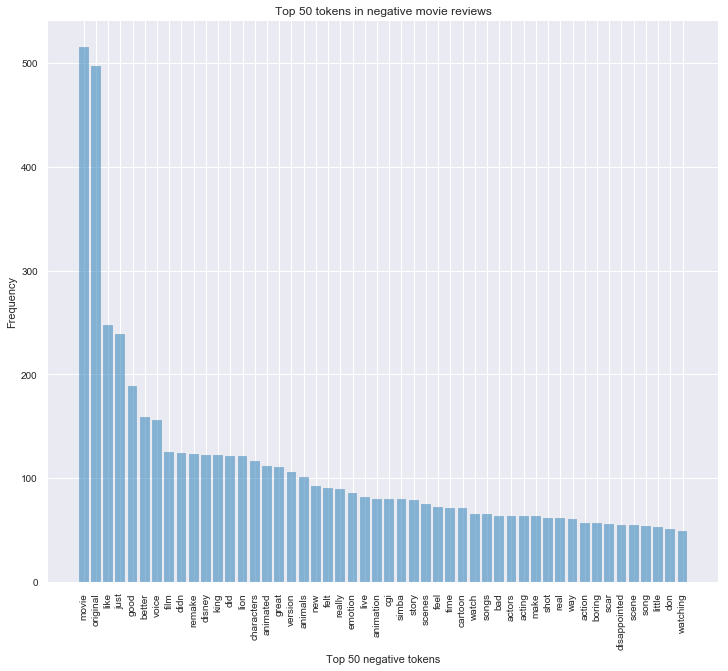

In [74]:
# Visulization for negative sentiment frequenct term
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative movie reviews')

We can see some negative words like "fault", "story", "horrible" are some of the high frequency words. But, there exists few neutral words like "movie", "original", "just" dominating the frequency plots.

Let's also take a look at top 50 positive tokens on a bar chart.

Text(0.5, 1.0, 'Top 50 tokens in positive movie reviews')

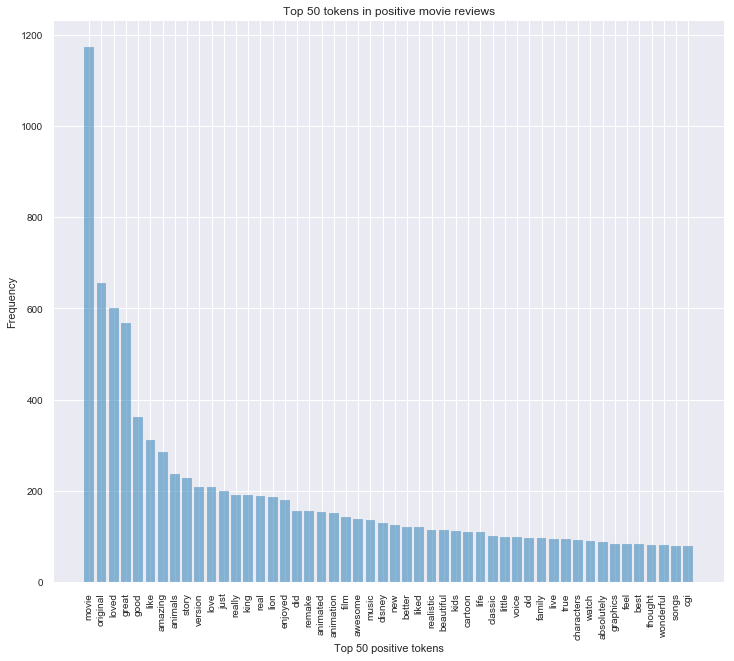

In [75]:
# Visulization for positive sentiment frequenct term
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive movie reviews')

Once again, there are some neutral words like "original", "movie", are quite high up in the rank.

<div class="alert alert-block alert-info" align=start><b></b>
    
    ------> Extraction of N- Grams

###### ******The distribution of top unigrams before removing stop words*******

the 6307
it 2882
was 2332
and 2327
to 1804
movie 1687
of 1536
original 1152
but 932
this 928
in 826
that 819
is 746
as 727
great 679
for 674
loved 620
with 592
not 565
my 563


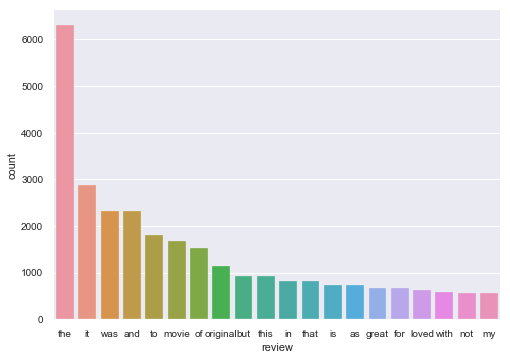

In [76]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['review'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['review' , 'count'])
sns.barplot(x='review', y='count', data=df1)

As we can see few words like The , It , was are high frequency words

###### *********The distribution of top unigrams after removing stop words**********

movie 1687
original 1152
great 679
loved 620
like 560
good 552
just 440
animals 339
amazing 330
version 315
king 313
lion 307
story 307
really 282
better 280
remake 279
did 277
film 269
animated 267
voice 256


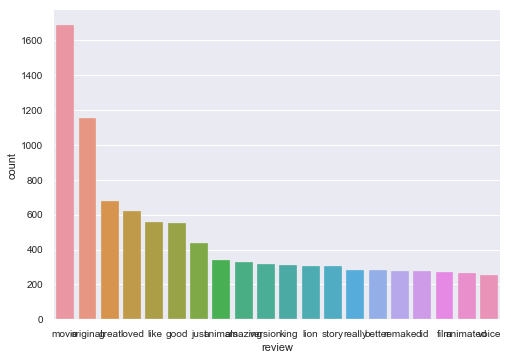

In [77]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['review'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['review' , 'count'])

sns.barplot(x='review', y='count', data=df2)

Movie Original , Great, loved etc are high two gram words 

###### ***********The distribution of top bigrams before removing stop words**********

the original 1032
it was 779
of the 679
the movie 527
to the 383
this movie 316
loved it 287
lion king 281
in the 262
and the 243
movie was 193
loved the 179
the animals 179
as the 174
from the 172
like the 161
the lion 161
with the 160
to see 160
was great 153


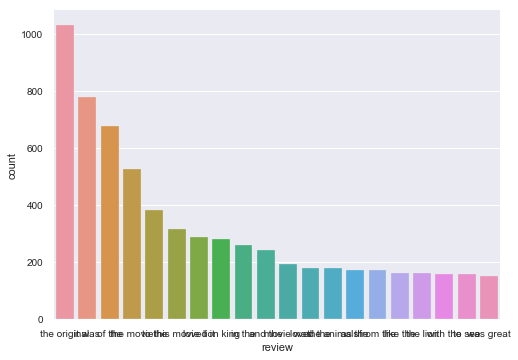

In [78]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['review'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['review' , 'count'])
sns.barplot(x='review', y='count', data=df3)


###### *******The distribution of top bigrams after removing stop words*****

lion king 281
great movie 152
live action 115
animated version 109
loved movie 92
original movie 82
good movie 77
felt like 69
true original 65
like original 63
year old 61
voice acting 61
timon pumba 49
movie great 47
story line 46
original animated 46
real animals 45
james earl 45
just like 45
voice actors 45


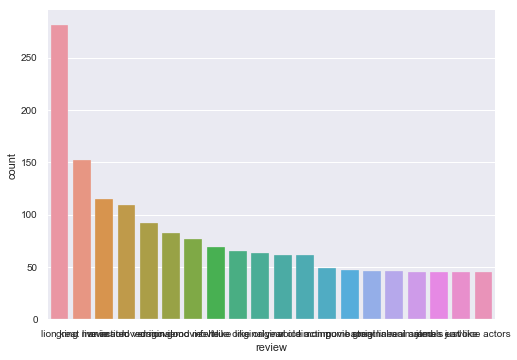

In [79]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['review'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['review' , 'count'])
sns.barplot(x='review', y='count', data=df4)


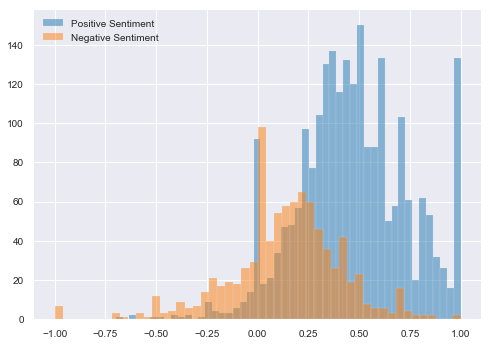

In [80]:
# Now Lets do some more analysis pertianing to weight
x1 = df.loc[df['sentiment'] == 0, 'polarity']
x0 = df.loc[df['sentiment'] == 1, 'polarity']

pos_sent = plt.hist(x1 , bins = 50 , label = 'Positive Sentiment' , alpha = 0.5)
neg_sent = plt.hist(x0 , bins = 50 , label = 'Negative Sentiment' , alpha = 0.5)

plt.legend(loc ='best')
plt.show()

#### Part of speech Tagging

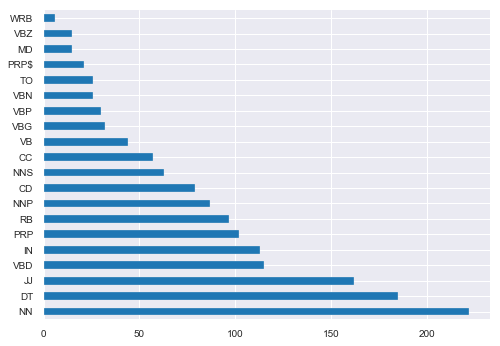

In [82]:
pos = TextBlob(str(df['review']))
#print(pos.tags)
pos_df = pd.DataFrame(pos.tags, columns = ['word' , 'pos'])
pos_df.pos.value_counts()[:20].plot(kind ='barh')
#print(pos_df)

As easily analyzed " noun, singular ‘desk’ " , "adjective ‘big’ " etc are appearing most of times in the web scrapped data set.

### Univariate visualization

In [87]:
df.columns

Index(['Reviewer_Name', 'Profanity', 'Spoilers', 'SuperReviewer', 'Verified',
       'review', 'score', 'Reviewer_ID', 'Date', 'Month', 'sentiment',
       'polarity', 'review_len', 'word_count'],
      dtype='object')

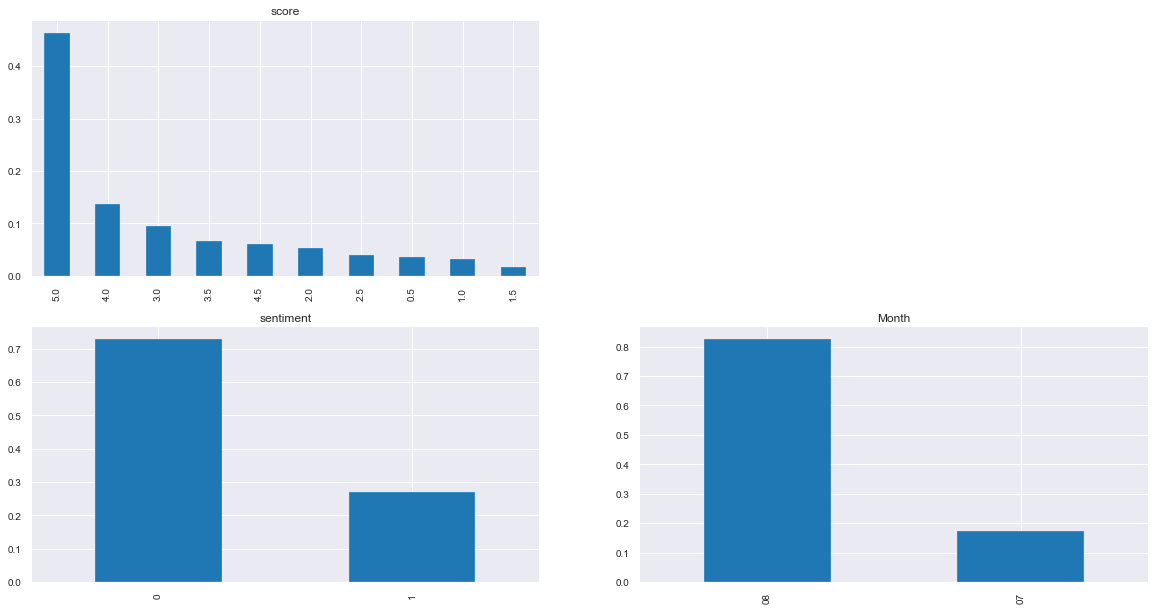

In [88]:
plt.figure(1) 
plt.subplot(221)
df['score'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'score')

plt.subplot(223)
df['sentiment'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'sentiment')

plt.subplot(224)
df['Month'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Month')

Skew is: -0.307463


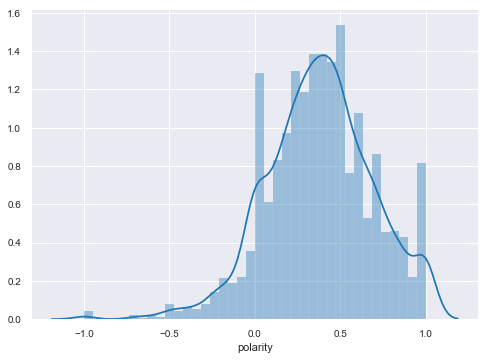

In [89]:
sns.distplot(df['polarity'])
print("Skew is: %f" % df['polarity'].skew())

-Polarity is almost normally distributed.    

-As we can see few of the polarity is near to negative values

###### The distribution of  " score"


Skew is: -1.124743


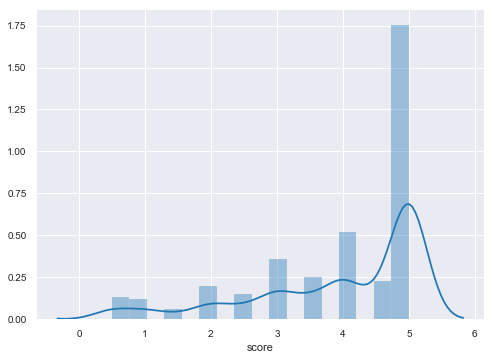

In [91]:
sns.distplot(df['score'])
print()
print("Skew is: %f" % df['score'].skew())

based on above analysis it clearly indicates that, lot of ratings are falling below 3(threshhold_value).. Data seems imbalance

##### The distribution review text lengths


Skew is: -1.124743


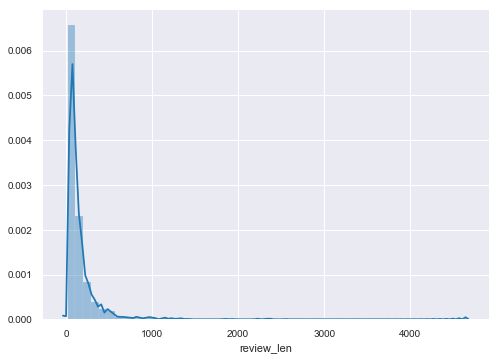

In [92]:
# df['review_len'].iplot(
#     kind='hist',
#     bins=100,
#     xTitle='review length',
#     linecolor='black',
#     yTitle='count',
#     title='Review Text Length Distribution')

sns.distplot(df['review_len'])
print()
print("Skew is: %f" % df['score'].skew())

some of the text length counts are very high..

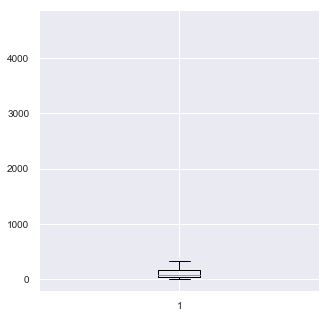

In [93]:
# From the box plot, let's identify the reviews length of characters.
fig,ax = plt.subplots(figsize=(5,5))
plt.boxplot(df.review_len)
plt.show()

From the above box plot, some of the reviews are falling under 500 character since avaerage length was nearly 21.

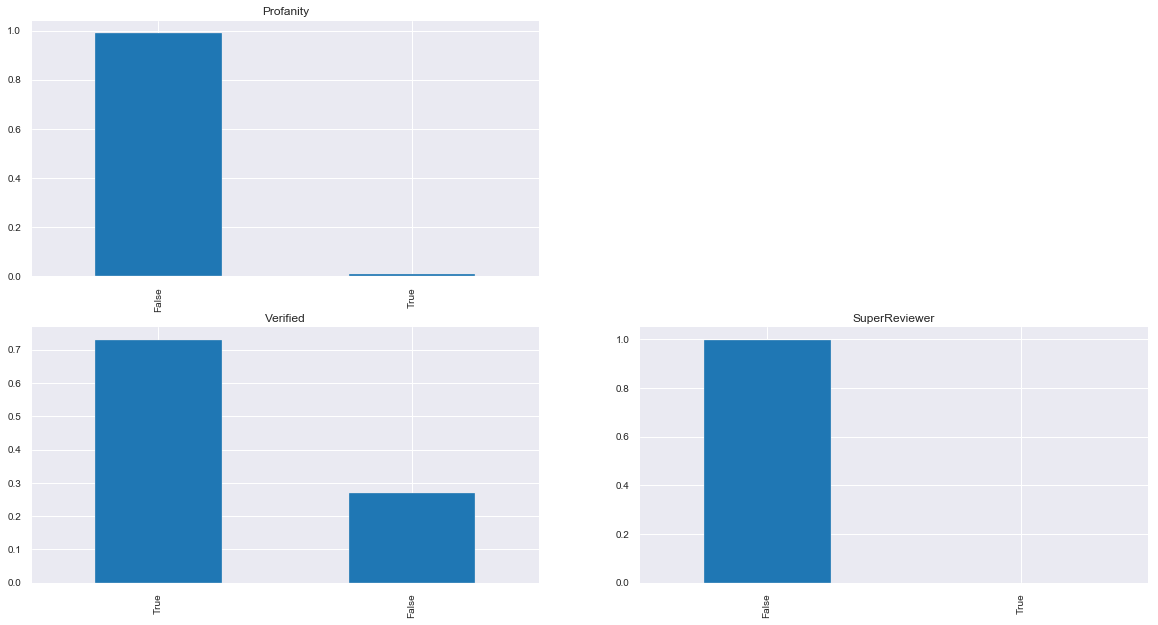

In [96]:
plt.figure(1) 
plt.subplot(221)
df['Profanity'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Profanity')

plt.subplot(223)
df['Verified'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Verified')

plt.subplot(224)
df['SuperReviewer'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'SuperReviewer')


in 3000+ reviews as we analyze that 2 spoilers might have given there reviews

These are valid reviewers however this plot is not describing much about the same

As this clearly indicates that around 873 viewers has given false reviews and 2367 has given True reviews about the movie

As this clearly indicates that around 873 viewers has given false reviews and 2367 has given True reviews about the movie

In [99]:
df.columns

Index(['Reviewer_Name', 'Profanity', 'Spoilers', 'SuperReviewer', 'Verified',
       'review', 'score', 'Reviewer_ID', 'Date', 'Month', 'sentiment',
       'polarity', 'review_len', 'word_count'],
      dtype='object')

In [105]:
temp = df.Reviewer_Name.value_counts()[:30]
trace = go.Bar(x=temp.index,
               y= np.round(temp.astype(float)/temp.values.sum(),2),
               text = np.round(temp.astype(float)/temp.values.sum(),2),
               textposition = 'inside',
               name = 'Reviewer_Name')
data = [trace]
layout = go.Layout(
    autosize=False,
    width=800,
    height=400,title = "Reviewer Name Distribution"
)
#
#
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Google , facebook , jennifer and mary one of those reviewers who might have updated reviews many a times.

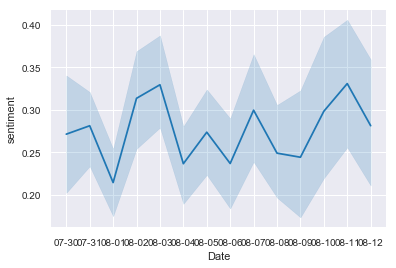

In [106]:
sns.lineplot(x="Date", y="sentiment",sizes=(.25, 2.5), data=df)

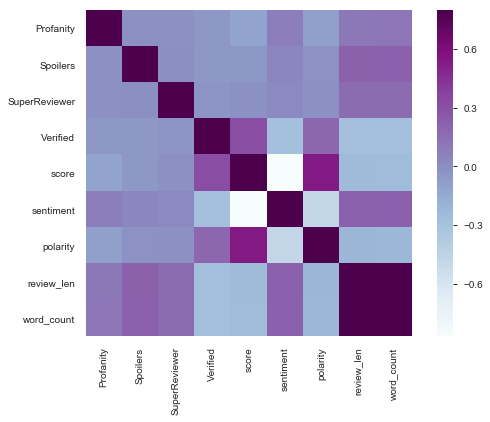

In [107]:
# Correlation matrix of data
matrix = df.corr()
f,ax = plt.subplots(figsize =(9,6))
sns.heatmap(matrix , vmax = 0.8, square = True , cmap ='BuPu')

In [108]:
tfidf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

### Step-7 : LSA Modelling and LDA Modelling

### LSA MODELLING

In [85]:
from sklearn.decomposition import TruncatedSVD
reindexed_data = df['review']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)
    
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words
    
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  movie original loved
Topic 2:  loved absolutely kids
Topic 3:  great movie remake
Topic 4:  amazing animals real
Topic 5:  awesome movie good
Topic 6:  good original animated


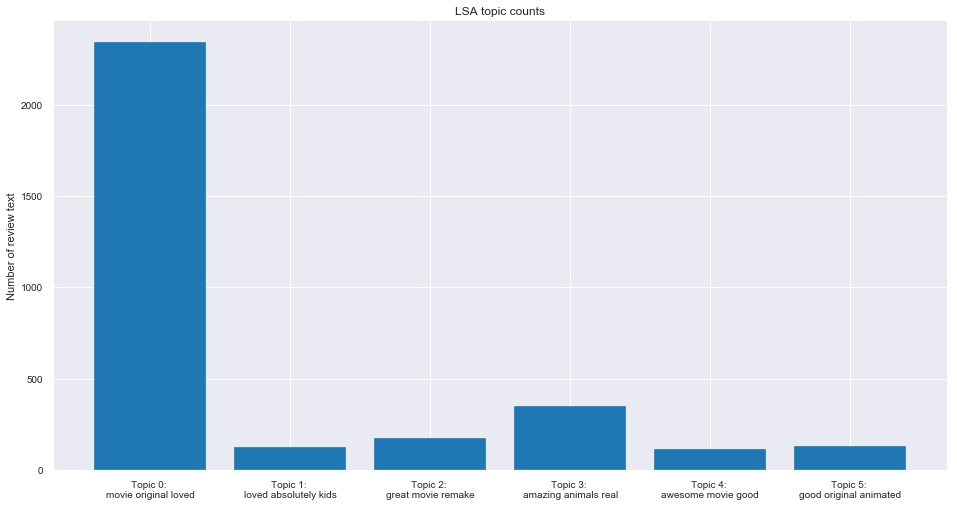

In [86]:
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of review text');
ax.set_title('LSA topic counts');
plt.show();

### LDA MODELLIING

In [109]:
def freq_words(x, terms = 40):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

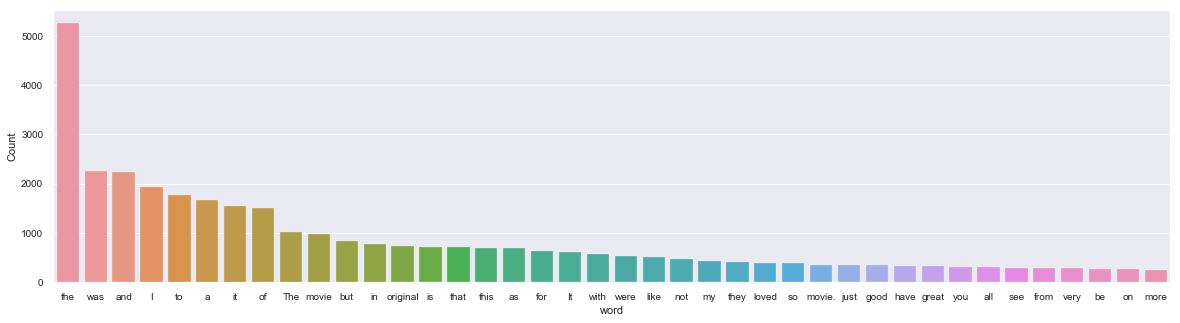

In [110]:
freq_words(df['review'])

In [111]:
# replace "n't" with " not"
df['review'] = df['review'].str.replace("n\'t", " not")

# remove unwanted characters, numbers and symbols
df['review'] = df['review'].str.replace("[^a-zA-Z#]", " ")

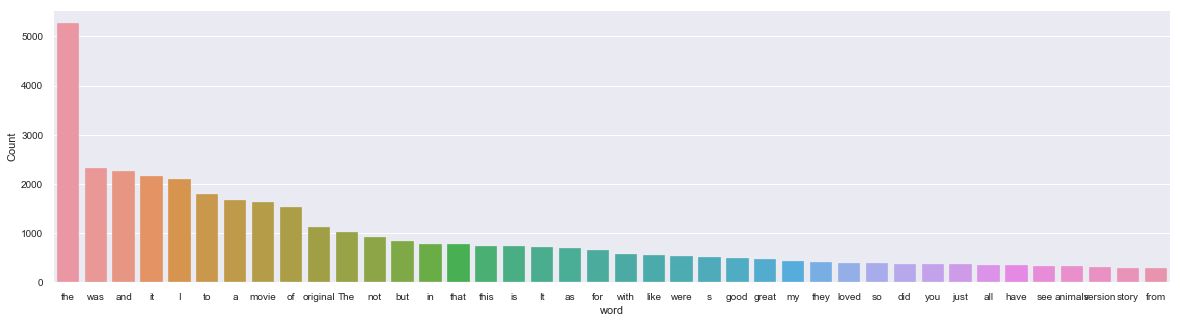

In [112]:
freq_words(df['review'])

In [200]:
df['review'].head(10).tolist()

['okay but like the original one',
 'loved the whole movie',
 'genuinely don know where the poor critic reviews came lost interest seeing the film due their poor reviews but eventually got around seeing and truly thought they did magnificent job fully with the fans this and score the movie solid Would higher but Beyonce put damper things She too much Her macho girl routine over the top and cheesy',
 'Awesome amazing great movie',
 'Five stars This was not only treat for husband and but also our year old grandson many positives kept having tell myself these were not real animals The only thing that could use little improvement the ending relationship the rest the film the ending moved along too quickly perhaps just did not want end',
 'was great movie whole Family enjoyed',
 'loved the length the movie',
 'Watched with granddaughter and all she could think about was bringing her daddy see again Great remake',
 'Loved for kids',
 'was pleasantly surprised was very well done and very ente

In [113]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [114]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

In [115]:
# remove short words (length < 3)
df['review'] = df['review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['review']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

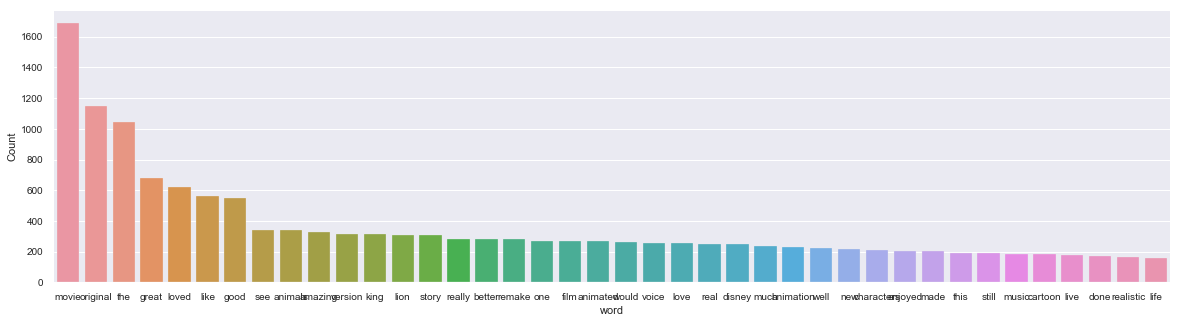

In [116]:
freq_words(reviews, 40)

In [117]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [118]:
def lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [119]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['loved', 'whole', 'movie']


In [120]:
print(tokenized_reviews[1])
len(tokenized_reviews[1])

['loved', 'whole', 'movie']


3

In [121]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1])
len(reviews_2[1])

['whole', 'movie']


2

In [122]:
set(tokenized_reviews[1]) - set(reviews_2[1])

{'loved'}

In [123]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))
    
df['reviews'] = reviews_3

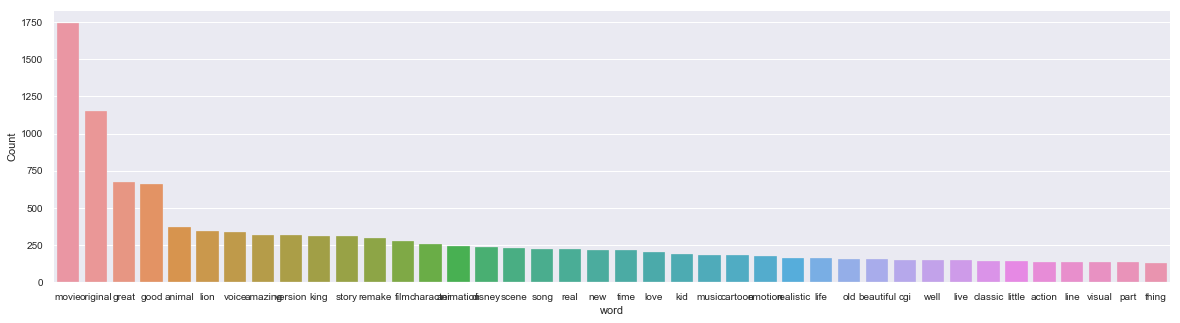

In [124]:
freq_words(df['reviews'], 40)

In [125]:
# Create the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(reviews_2)

In [126]:
# Convert list of reviews (reviews_2) into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [127]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

In [128]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=7, 
                random_state=100,
                chunksize=1000,
                passes=50)

In [129]:
lda_model.print_topics()

[(0,
  '0.055*"voice" + 0.041*"movie" + 0.032*"everything" + 0.026*"beyonce" + 0.024*"bad" + 0.022*"nala" + 0.019*"thing" + 0.018*"simba" + 0.016*"song" + 0.015*"job"'),
 (1,
  '0.047*"character" + 0.034*"emotion" + 0.024*"voice" + 0.023*"animal" + 0.023*"original" + 0.021*"movie" + 0.018*"part" + 0.017*"expression" + 0.015*"scene" + 0.015*"actor"'),
 (2,
  '0.138*"movie" + 0.133*"great" + 0.033*"animation" + 0.032*"awesome" + 0.026*"amazing" + 0.021*"original" + 0.021*"love" + 0.021*"music" + 0.020*"family" + 0.020*"excellent"'),
 (3,
  '0.110*"movie" + 0.084*"good" + 0.050*"original" + 0.037*"version" + 0.034*"kid" + 0.024*"old" + 0.023*"time" + 0.021*"cartoon" + 0.016*"year" + 0.015*"lion"'),
 (4,
  '0.072*"original" + 0.058*"animal" + 0.037*"amazing" + 0.031*"real" + 0.030*"film" + 0.025*"story" + 0.025*"movie" + 0.022*"new" + 0.020*"realistic" + 0.017*"nothing"'),
 (5,
  '0.061*"beautiful" + 0.043*"story" + 0.032*"original" + 0.030*"line" + 0.024*"cinematography" + 0.023*"graphic"

In [64]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.054171  0.117675       1        1  25.099045
3     -0.057487  0.202902       2        1  18.479868
4     -0.132700  0.065769       3        1  15.721053
2     -0.184565 -0.088304       4        1  14.961937
1      0.176680  0.057971       5        1  12.010962
0      0.213615 -0.131797       6        1   7.722077
5     -0.069714 -0.224216       7        1   6.005055, topic_info=     Category         Freq         Term        Total  loglift  logprob
24    Default   549.000000        great   549.000000  30.0000  30.0000
1     Default  1533.000000        movie  1533.000000  29.0000  29.0000
56    Default   578.000000         good   578.000000  28.0000  28.0000
25    Default   328.000000       animal   328.000000  27.0000  27.0000
148   Default   299.000000        voice   299.000000  26.0000  26.0000
136   Default   245.000000    character   245.000000  25.0000  25.0000
22    Default   306.000000      amazing   306.000000  24.0000  24.0000
53    Default   122.000000    beautiful   122.000000  23.0000  23.0000
46    Default   172.000000          kid   172.000000  22.0000  22.0000
152   Default   309.000000        story   309.000000  21.0000  21.0000
23    Default   133.000000      awesome   133.000000  20.0000  20.0000
61    Default   307.000000      version   307.000000  19.0000  19.0000
55    Default   173.000000      emotion   173.000000  18.0000  18.0000
45    Default   274.000000       remake   274.000000  17.0000  17.0000
0     Default  1063.000000     original  1063.000000  16.0000  16.0000
9     Default   263.000000         film   263.000000  15.0000  15.0000
35    Default   187.000000         real   187.000000  14.0000  14.0000
177   Default   114.000000   everything   114.000000  13.0000  13.0000
68    Default   234.000000    animation   234.000000  12.0000  12.0000
105   Default   141.000000         line   141.000000  11.0000  11.0000
50    Default   117.000000          bad   117.000000  10.0000  10.0000
33    Default   138.000000          old   138.000000   9.0000   9.0000
109   Default   120.000000      graphic   120.000000   8.0000   8.0000
130   Default   216.000000         song   216.000000   7.0000   7.0000
82    Default   310.000000         lion   310.000000   6.0000   6.0000
41    Default    85.000000       family    85.000000   5.0000   5.0000
322   Default    83.000000    excellent    83.000000   4.0000   4.0000
189   Default   218.000000        scene   218.000000   3.0000   3.0000
80    Default   293.000000         king   293.000000   2.0000   2.0000
97    Default   210.000000         time   210.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
301    Topic7     5.160267   courageous     5.924771   2.6744  -5.7739
349    Topic7     5.047855       clever     5.815176   2.6711  -5.7959
2854   Topic7     4.596051     stubborn     5.358018   2.6592  -5.8897
2233   Topic7     4.576255    substance     5.348411   2.6566  -5.8940
2074   Topic7     4.484223    criticism     5.249031   2.6551  -5.9143
71     Topic7    11.359177    brilliant    13.500632   2.6399  -4.9849
1897   Topic7     3.850453       refund     4.611127   2.6323  -6.0667
2856   Topic7     3.832570         dope     4.592945   2.6316  -6.0713
2861   Topic7     3.832466       cualty     4.592979   2.6315  -6.0714
53     Topic7   101.371147    beautiful   122.654999   2.6220  -2.7961
1030   Topic7     7.749144       subtle    10.085178   2.5491  -5.3673
77     Topic7    32.280323        heart    51.541290   2.3446  -3.9404
70     Topic7    14.155810       boring    20.378519   2.4482  -4.7648
112    Topic7    19.574181         same    30.941212   2.3547  -4.4407
96     Topic7    14.872890  spectacular    25.144369   2.2875  -4.7153
220    Topic7    22.700565        humor    45.922077   2.1080  -4.2925
105    Topic7    49.929825         line   141.306549   1.7723  